# Interactias Geo Selected Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

The networks create from all interacting species globally can be misleading, because not all members of the network live in one place. The next step is to filter the species in the network geographically, just to find the interactions that might occur in an area.

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species.
I will then harvest all the interactions for those species to create two tiers of interactions.
I will then count all the occurences of these in species in GBIF for an area.
I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [1]:
import sys
print(sys.version)

#Python 3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
#pygbif 0.3.0

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pygbif import species
from pygbif import occurrences as occ

### Setting up some parameters

In [59]:
# There is no point accepting all the species that have more than one record.
# There are too many casual records of plants and biirds
thresholdForOccNum = 30

In [4]:
## Define the country of interest
country  = 'BE'

### Define the key taxon for the notebook for which to find all interactions


In [77]:
#taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Abramis brama"
#taxon = "Dikerogammarus villosus" # killer shrimp
#taxon = "Lantanophaga pusillidactyla"
#taxon = "Lantana camara"
taxon = "Cirsium vulgare"
#taxon = "Procyon lotor" # raccoon
#taxon = "Carpobrotus edulis"
#taxon = "not exist"
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [6]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [7]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [8]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [9]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [10]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [11]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.

In [12]:
data = data[data.interactionTypeName != 'interactsWith']

data = data[data.interactionTypeName != 'visitsFlowersOf']

data = data[data.interactionTypeName != 'pollinates']

len(data)

368895

## Check to see if the taxon exits in GBIF

In [78]:
try:
    #NOTE: The function method name_suggest has a different behavior with regards to the gender of Latin names to name_backbone
    # If name_backbone is given a name in one gender it can still return the best match from the GBIF backbone if that
    # name is spelled as if it was another gender.
    #key = species.name_suggest(q=taxon, limit = 1)
    match = species.name_backbone(name=taxon, limit = 1)
    #print(key)
    
    # if there is no match this is returned form .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
    if match['matchType'] == 'NONE':
        raise ValueError("TAXON NOT FOUND ON GBIF!")
    else:
        key = match['usageKey']
except ValueError as ve:
    print(ve)
    exit(1)




In [79]:

print('The taxon to be studied is ' + match['scientificName'])

The taxon to be studied is Cirsium vulgare (Savi) Ten.


In [80]:
# What are all the types of interactions involving taxon as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array([], dtype=object)

In [81]:
# What are all the types of interactions involving taxon as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'hasHost', 'parasiteOf', 'livesInsideOf', 'preysOn'],
      dtype=object)

How many taxon sources do I have?

In [82]:
len(data[data['sourceTaxonName'] == taxon])

0

How many taxon targets do I have?

In [83]:
len(data[data['targetTaxonName'] == taxon])

80

Gather together all the data where the target is the taxon in question.

In [84]:
# What are the columns of this dataset?
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceTaxonSpeciesName',
       'sourceTaxonSpeciesId', 'sourceTaxonGenusName', 'sourceTaxonGenusId',
       'sourceTaxonFamilyName', 'sourceTaxonFamilyId', 'sourceTaxonOrderName',
       'sourceTaxonOrderId', 'sourceTaxonClassName', 'sourceTaxonClassId',
       'sourceTaxonPhylumName', 'sourceTaxonPhylumId',
       'sourceTaxonKingdomName', 'sourceTaxonKingdomId', 'sourceId',
       'sourceOccurrenceId', 'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPath

## Get the primary interation data for the species in question

In [85]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

In [86]:
interactDataTaxon.count()

sourceTaxonId                80
sourceTaxonIds               80
sourceTaxonName              80
sourceTaxonRank              80
sourceTaxonPathNames         80
                             ..
sourceCitation               80
sourceNamespace              80
sourceArchiveURI             80
sourceDOI                    31
sourceLastSeenAtUnixEpoch    80
Length: 80, dtype: int64

## Get a list of all the primary interacting species

In [87]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [88]:
interactingTaxa

,0
0,Streptopelia chinensis
1,Megachile cochisiana
2,Megachile inimica
3,Heriades micropthalma
4,Dianthidium parvum
...,...
74,Homoeosoma nebulella
75,Pyrausta subsequalis
76,Trichosirocalus horridus
77,Spermophilus columbianus


## Get all the secondary interactions

In [89]:
for name in interactingTaxa[0]:
    interactDataTaxon = interactDataTaxon.append(data[data['targetTaxonName'] == name])
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == name])

In [90]:
interactDataTaxon.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
206694,EOL_V2:1050136,EOL_V2:1050136 | WD:Q30944 | OTT:549522 | WORM...,Streptopelia chinensis,species,Animalia | Chordata | Aves | Columbiformes | C...,EOL:1 | EOL:694 | EOL:695 | EOL:7976 | EOL:797...,kingdom | phylum | class | order | family | ge...,Streptopelia chinensis,EOL_V2:1050136,Streptopelia,...,-7.573824e+11,https://en.wiktionary.org/wiki/support,"Schwartz, C. W. and E. R. Schwartz. 1951. A su...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
1098708,GBIF:1336404,GBIF:1336404 | OTT:3265326 | GBIF:1336404 | IT...,Megachile cochisiana,species,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | GBIF:54 | GBIF:216 | GBIF:1457 | GBIF...,kingdom | phylum | class | order | family | ge...,Megachile cochisiana,GBIF:1336404,Megachile,...,1.030666e+12,https://en.wiktionary.org/wiki/support,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",10.7717/peerj.5867/supp-2,NaN,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",globalbioticinteractions/carril2018,https://github.com/globalbioticinteractions/ca...,NaN,2019-11-03T00:09:02.078Z
1098786,EOL:2751452,EOL:2751452 | OTT:3264684 | EOL:2751452 | GBIF...,Megachile inimica,species,Animalia | Arthropoda | Insecta | Hymenoptera ...,EOL:1 | EOL:164 | EOL:344 | EOL:648 | EOL:676 ...,kingdom | phylum | class | order | superfamily...,Megachile inimica,EOL:2751452,Megachile,...,1.027382e+12,https://en.wiktionary.org/wiki/support,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",10.7717/peerj.5867/supp-2,NaN,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",globalbioticinteractions/carril2018,https://github.com/globalbioticinteractions/ca...,NaN,2019-11-03T00:09:02.078Z
1100084,GBIF:1336861,GBIF:1336861 | OTT:4530543 | ITIS:715438 | GBI...,Heriades micropthalma,species,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | GBIF:54 | GBIF:216 | GBIF:1457 | GBIF...,kingdom | phylum | class | order | family | ge...,Heriades micropthalma,GBIF:1336861,Heriades,...,1.025914e+12,https://en.wiktionary.org/wiki/support,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",10.7717/peerj.5867/supp-2,NaN,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",globalbioticinteractions/carril2018,https://github.com/globalbioticinteractions/ca...,NaN,2019-11-03T00:09:02.078Z
1100715,GBIF:1337537,GBIF:1337537 | OTT:4530244 | GBIF:1337537 | IT...,Dianthidium parvum,species,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | GBIF:54 | GBIF:216 | GBIF:1457 | GBIF...,kingdom | phylum | class | order | family | ge...,Dianthidium parvum,GBIF:1337537,Dianthidium,...,1.062720e+12,https://en.wiktionary.org/wiki/support,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",10.7717/peerj.5867/supp-2,NaN,"Carril OM, Griswold T, Haefner J, Wilson JS. (...",globalbioticinteractions/carril2018,https://github.com/globalbioticinteractions/ca...,NaN,2019-11-03T00:09:02.078Z


In [91]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [92]:
interactingTaxa

,0
0,Streptopelia chinensis
1,Megachile cochisiana
2,Megachile inimica
3,Heriades micropthalma
4,Dianthidium parvum
...,...
1468,Rumex acetosella
1469,Agrostis bourgeaei
1470,Cerastium arvense
1471,Equisetum scirpoides


In [93]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonFamilyName', 'interactionTypeName',
       'targetTaxonName','targetTaxonRank',
        ]].dropna(subset=['targetTaxonName','sourceTaxonName'])

In [94]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
206694,EOL_V2:1050136,Streptopelia chinensis,species,Columbidae,eats,Cirsium vulgare,species
1098708,GBIF:1336404,Megachile cochisiana,species,Megachilidae,hasHost,Cirsium vulgare,species
1098786,EOL:2751452,Megachile inimica,species,Megachilidae,hasHost,Cirsium vulgare,species
1100084,GBIF:1336861,Heriades micropthalma,species,Megachilidae,hasHost,Cirsium vulgare,species
1100715,GBIF:1337537,Dianthidium parvum,species,Megachilidae,hasHost,Cirsium vulgare,species


In [95]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'hasHost', 'parasiteOf', 'livesInsideOf', 'preysOn',
       'ectoParasiteOf', 'endoparasiteOf', 'pathogenOf', 'ectoParasitoid',
       'endoparasitoidOf', 'mutualistOf', 'parasitoidOf', 'guestOf',
       'visits', 'ecologicallyRelatedTo', 'hasDispersalVector'],
      dtype=object)

In [96]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
eats                     1078
parasiteOf                640
hasHost                   581
preysOn                    67
mutualistOf                63
pathogenOf                 52
ectoParasitoid             13
ectoParasiteOf              9
livesInsideOf               8
ecologicallyRelatedTo       4
visits                      3
endoparasitoidOf            3
endoparasiteOf              3
guestOf                     2
parasitoidOf                1
hasDispersalVector          1
dtype: int64

In [97]:
len(cleanInteractDataTaxon)

2528

In [98]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
206694,EOL_V2:1050136,Streptopelia chinensis,species,Columbidae,eats,Cirsium vulgare,species
1098708,GBIF:1336404,Megachile cochisiana,species,Megachilidae,hasHost,Cirsium vulgare,species
1098786,EOL:2751452,Megachile inimica,species,Megachilidae,hasHost,Cirsium vulgare,species
1100084,GBIF:1336861,Heriades micropthalma,species,Megachilidae,hasHost,Cirsium vulgare,species
1100715,GBIF:1337537,Dianthidium parvum,species,Megachilidae,hasHost,Cirsium vulgare,species


## Create a file with all the nodes and their attributes

In [99]:
# Get the source nodes
nodes = cleanInteractDataTaxon.drop_duplicates(subset=['sourceTaxonName'])

In [100]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.drop_duplicates(subset=['targetTaxonName']))

In [101]:
nodes.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
206694,EOL_V2:1050136,Streptopelia chinensis,species,Columbidae,eats,Cirsium vulgare,species
1098708,GBIF:1336404,Megachile cochisiana,species,Megachilidae,hasHost,Cirsium vulgare,species
1098786,EOL:2751452,Megachile inimica,species,Megachilidae,hasHost,Cirsium vulgare,species
1100084,GBIF:1336861,Heriades micropthalma,species,Megachilidae,hasHost,Cirsium vulgare,species
1100715,GBIF:1337537,Dianthidium parvum,species,Megachilidae,hasHost,Cirsium vulgare,species


In [102]:
interactingTaxa.count()


0    1473
dtype: int64

### This function takes a name string and checks on GBIF to see if the name exists there.

In [103]:
def speciesExistsInGBIF(name, rank):
    try:
        # Uses the dataset key for the GBIF backbone taxonomy
        #key = species.name_suggest(q=name, rank=rank, datasetKey = "d7dddbf4-2cf0-4f39-9b2a-bb099caae36c", limit = 1)
        match = species.name_backbone(name=name, rank=rank, limit = 1)
        #print(key)

        # if there is no match this is returned from .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
        if match['matchType'] == 'NONE':
            return False
        else:
            return match
    except ValueError as ve:
        print(ve)
        exit(1)

### Check that the species in question is actually found on GBIF

In [104]:
if(speciesExistsInGBIF(taxon, "species") == False):
    print("##### {0} has not been found on GBIF #####".format(taxon))

### Check to see which taxa in the interaction network are found in GBIF and list those ones that are not

In [105]:
taxaNotFound = []
taxaFound = []

print('Taxa from GLoBI, but not found in GBIF')
for name in interactingTaxa.iterrows():
    GBIFName = speciesExistsInGBIF(name[1], "species")
    if GBIFName == False:
        print(name[1][0])
        taxaNotFound.append({'name': name[1][0]})
    else:
        taxaFound.append(GBIFName)
    
    #print(name[1])

# Convert to a Pandas dataframe
taxaFound = pd.DataFrame(taxaFound)

Taxa from GLoBI, but not found in GBIF
Cloudy wing virus
Iflavirus
Lake Sinai Virus TO
Lake Sinai Virus SA2
Lake Sinai Virus SA1
Lake Sinai Virus NE
Aparavirus
Chronic bee paralysis virus
Cripavirus
Bee Macula-like virus
Apis mellifera filamentous virus
Apis flavivirus
Apis dicistrovirus
Virus
Varroa destructor virus-1
NPV
Cypovirus
Trypanosoma otospermophili
Nuclear polyhedrosis virus
Plumbago zeylanica


In [106]:
len(taxaFound)

1453

In [107]:
taxaFound.head(2)

,usageKey,scientificName,canonicalName,rank,status,confidence,matchType,kingdom,phylum,order,...,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,synonym,class,acceptedUsageKey,note
0,2495715,"Streptopelia chinensis (Scopoli, 1786)",Streptopelia chinensis,SPECIES,ACCEPTED,98,EXACT,Animalia,Chordata,Columbiformes,...,44.0,212.0,1446.0,5233.0,2495657.0,2495715.0,False,Aves,NaN,NaN
1,1336404,"Megachile cochisiana Mitchell, 1934",Megachile cochisiana,SPECIES,ACCEPTED,98,EXACT,Animalia,Arthropoda,Hymenoptera,...,54.0,216.0,1457.0,7911.0,1335011.0,1336404.0,False,Insecta,NaN,NaN


### This function takes a GBIF species key and counts how many occurences exist.

In [108]:
def speciesCountInGBIF(key, country):
    count = 0
    try:
        #return occ.count(taxonKey=key, country = country)
        count = occ.count(taxonKey=key, country = country, basisOfRecord = "HUMAN_OBSERVATION")
        count += occ.count(taxonKey=key, country = country, basisOfRecord = "OBSERVATION")
        return count
    except ValueError as ve:
        print(ve)
        exit(1)

### Loop over all the taxa that are in the interaction network and are in GBIF to find the ones that have been found in the country

In [109]:
taxaFoundInCountry = []

for GBIFtaxon in taxaFound.iterrows():
    #print(GBIFtaxon[1]['usageKey'])
    #print('{0} found {1} time in Belgium.'.format(GBIFtaxon,speciesCountInGBIF(GBIFtaxon,country)))
    GBIFOccCount = speciesCountInGBIF(GBIFtaxon[1]['usageKey'],country)
    if GBIFOccCount > thresholdForOccNum: # The threshold for observations is not greater than one, due to all the casual records
        taxaFoundInCountry.append({'key': GBIFtaxon[1]['usageKey'], 'species': GBIFtaxon[1]['canonicalName'], 'count': GBIFOccCount})
        

In [110]:
# Convert to a Pandas dataframe
taxaFoundInCountry = pd.DataFrame(taxaFoundInCountry)    

In [111]:
print("The number of species left in the network is {0}".format(len(taxaFoundInCountry)))

The number of species left in the network is 265


In [112]:
taxaFoundInCountry

,key,species,count
0,2020591,Tingis cardui,65
1,4299368,Vanessa cardui,69264
2,1341976,Apis mellifera,10339
3,2494686,Carduelis carduelis,82975
4,3152861,Liriodendron tulipifera,88
...,...,...,...
260,2105360,Chrysoperla carnea,1607
261,3171949,Verbascum thapsus,6404
262,5359429,Trifolium dubium,19280
263,2888995,Rumex acetosella,21932


## Drawing a network of the interactions

Now that I have a list of all the species in the country I can use this as my nodes list for the network diagram.

In [113]:
#networkx seems to be a leading network tool in Python
import networkx as nx
import matplotlib.pyplot as plt

In [114]:
# Create graphic object
G = nx.DiGraph()

In [115]:
# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

len(list(G.nodes))

0

In [116]:
cleanInteractDataTaxon

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
206694,EOL_V2:1050136,Streptopelia chinensis,species,Columbidae,eats,Cirsium vulgare,species
1098708,GBIF:1336404,Megachile cochisiana,species,Megachilidae,hasHost,Cirsium vulgare,species
1098786,EOL:2751452,Megachile inimica,species,Megachilidae,hasHost,Cirsium vulgare,species
1100084,GBIF:1336861,Heriades micropthalma,species,Megachilidae,hasHost,Cirsium vulgare,species
1100715,GBIF:1337537,Dianthidium parvum,species,Megachilidae,hasHost,Cirsium vulgare,species
...,...,...,...,...,...,...,...
2001880,EOL:930505,Scrobipalpa acuminatella,species,Gelechiidae,eats,Cirsium vulgare,species
2040011,EOL:937162,Homoeosoma nebulella,species,Pyralidae,eats,Cirsium vulgare,species
2041935,EOL:526812,Pyrausta subsequalis,species,Crambidae,eats,Cirsium vulgare,species
2670211,EOL_V2:2668331,Trichosirocalus horridus,species,Curculionidae,eats,Cirsium vulgare,species


In [117]:
# iterate over rows with iterrows()
for index, row in taxaFoundInCountry.iterrows():
     # access data using column names
    print('A: ', row['species'], row['count'], row['key'])
    G.add_node(row['species'])
    #G.add_node(row['targetTaxonName'])
    #print(colorInteractionsDf[colorInteractionsDf.interaction == row['interactionTypeName']].iloc[:,1])
    #G.add_edge(row['targetTaxonName'], row['sourceTaxonName'], label = row['interactionTypeName'])
    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['sourceTaxonName']:
            print('B: ', edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['targetTaxonName']: 
                    print('C: ', edge[1]['sourceTaxonName'],row2['species'])
                    G.add_edge(edge[1]['sourceTaxonName'], row2['species'], label = edge[1]['interactionTypeName'])
            #if row['species'] == edge[1]['sourceTaxonName']:
            #    #print(edge[1]['sourceTaxonName'],row['species'])
            #    G.add_edge(edge[1]['targetTaxonName'], edge[1]['sourceTaxonName'], label = edge[1]['interactionTypeName'])

A:  Tingis cardui 65 2020591
B:  Tingis cardui Cirsium vulgare Tingis cardui
C:  Tingis cardui Cirsium vulgare
B:  Tingis cardui Cirsium vulgare Tingis cardui
C:  Tingis cardui Cirsium vulgare
B:  Tingis cardui Cirsium palustre Tingis cardui
C:  Tingis cardui Cirsium palustre
B:  Tingis cardui Carduus nutans Tingis cardui
C:  Tingis cardui Carduus nutans
B:  Tingis cardui Cirsium vulgare Tingis cardui
C:  Tingis cardui Cirsium vulgare
A:  Vanessa cardui 69264 4299368
B:  Vanessa cardui Cirsium vulgare Vanessa cardui
C:  Vanessa cardui Cirsium vulgare
B:  Vanessa cardui Vanessa cardui Vanessa cardui
C:  Vanessa cardui Vanessa cardui
B:  Vanessa cardui Urtica dioica Vanessa cardui
C:  Vanessa cardui Urtica dioica
B:  Vanessa cardui Malva neglecta Vanessa cardui
C:  Vanessa cardui Malva neglecta
B:  Vanessa cardui Malva moschata Vanessa cardui
C:  Vanessa cardui Malva moschata
B:  Vanessa cardui Echium vulgare Vanessa cardui
C:  Vanessa cardui Echium vulgare
B:  Vanessa cardui Cirsium vul

B:  Vanessa cardui Triteleia laxa Vanessa cardui
B:  Vanessa cardui Nama demissa Vanessa cardui
B:  Vanessa cardui Lupinus arizonicus Vanessa cardui
B:  Vanessa cardui Geraea canescens Vanessa cardui
B:  Vanessa cardui Dichelostemma capitatum Vanessa cardui
B:  Vanessa cardui Geranium molle Vanessa cardui
C:  Vanessa cardui Geranium molle
B:  Vanessa cardui Cryptantha muricata Vanessa cardui
B:  Vanessa cardui Eryngium yuccifolium Vanessa cardui
B:  Vanessa cardui Ageratina altissima Vanessa cardui
B:  Vanessa cardui Zinnia elegans Vanessa cardui
B:  Vanessa cardui Symphyotrichum novae-angliae Vanessa cardui
B:  Vanessa cardui Lupinus arizonicus Vanessa cardui
B:  Vanessa cardui Lantana montevidensis Vanessa cardui
B:  Vanessa cardui Baccharis pilularis Vanessa cardui
B:  Vanessa cardui Monardella linoides Vanessa cardui
B:  Vanessa cardui Baccharis sarothroides Vanessa cardui
B:  Vanessa cardui Eupatorium serotinum Vanessa cardui
B:  Vanessa cardui Cirsium pitcheri Vanessa cardui
B:  

B:  Apis mellifera Helminthotheca echioides Apis mellifera
C:  Apis mellifera Helminthotheca echioides
B:  Apis mellifera Helianthus annuus Apis mellifera
C:  Apis mellifera Helianthus annuus
B:  Apis mellifera Rudbeckia hirta Apis mellifera
C:  Apis mellifera Rudbeckia hirta
B:  Apis mellifera Cakile edentula Apis mellifera
B:  Apis mellifera Escallonia rubra Apis mellifera
B:  Apis mellifera Leonotis leonurus Apis mellifera
B:  Apis mellifera Trichostema lanceolatum Apis mellifera
B:  Apis mellifera Quercus lobata Apis mellifera
B:  Apis mellifera Callistemon citrinus Apis mellifera
B:  Apis mellifera Reynoutria japonica Apis mellifera
C:  Apis mellifera Reynoutria japonica
B:  Apis mellifera Pittosporum crassifolium Apis mellifera
B:  Apis mellifera Cynoglossum amabile Apis mellifera
B:  Apis mellifera Buddleja davidii Apis mellifera
C:  Apis mellifera Buddleja davidii
B:  Apis mellifera Euthamia graminifolia Apis mellifera
B:  Apis mellifera Verbesina virginica Apis mellifera
B:  A

B:  Apis mellifera Cordia gerascanthus Apis mellifera
B:  Apis mellifera Cardamine angustata Apis mellifera
B:  Apis mellifera Tiarella cordifolia Apis mellifera
B:  Apis mellifera Claytonia virginica Apis mellifera
B:  Apis mellifera Banisteriopsis muricata Apis mellifera
B:  Apis mellifera Byrsonima gardneriana Apis mellifera
B:  Apis mellifera Diplopterys pubipetala Apis mellifera
B:  Apis mellifera Isodon inflexus Apis mellifera
B:  Apis mellifera Allium thunbergii Apis mellifera
B:  Apis mellifera Hydrangea arborescens Apis mellifera
B:  Apis mellifera Lespedeza bicolor Apis mellifera
B:  Apis mellifera Fallopia japonica Apis mellifera
C:  Apis mellifera Fallopia japonica
B:  Apis mellifera Reseda luteola Apis mellifera
C:  Apis mellifera Reseda luteola
B:  Apis mellifera Lotus corniculatus Apis mellifera
C:  Apis mellifera Lotus corniculatus
B:  Apis mellifera Azorina vidalii Apis mellifera
B:  Apis mellifera Alstonia macrophylla Apis mellifera
B:  Apis mellifera Medusagyne oppos

A:  Tragopogon porrifolius 124 5386938
A:  Tanacetum vulgare 30347 3118274
A:  Tanacetum parthenium 3236 3118430
A:  Sonchus palustris 516 3105650
A:  Solidago virgaurea 4869 6446462
A:  Silybum marianum 597 3145214
A:  Serratula tinctoria 383 5388835
A:  Scorzonera humilis 282 3111049
A:  Scorzonera hispanica 59 3110905
A:  Pilosella officinarum 14726 9458333
A:  Picris hieracioides 3657 3093337
A:  Lactuca virosa 73 3140346
A:  Lactuca sativa 83 7403263
A:  Lactuca saligna 89 3140467
A:  Inula helenium 149 3148340
A:  Eupatorium cannabinum 27069 5402943
A:  Crepis foetida 220 5403470
A:  Cirsium oleraceum 12013 3113650
A:  Cirsium eriophorum 62 3112620
A:  Cirsium acaule 484 3112799
A:  Cichorium intybus 2840 5392252
A:  Glebionis coronaria 71 7627205
A:  Centaurea montana 101 9023462
A:  Centaurea jacea 16945 3128547
A:  Centaurea 39631 3127469
A:  Carthamus tinctorius 109 3138327
A:  Carlina vulgaris 6069 3105380
A:  Carduus tenuiflorus 399 3114627
A:  Carduus crispus 5577 3114649


In [118]:
# iterate over rows with iterrows()
for index, row in taxaFoundInCountry.iterrows():
    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['targetTaxonName']:
            #print(edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['sourceTaxonName']: 
                    print(edge[1]['targetTaxonName'],row2['species'])
                    G.add_edge(row2['species'], edge[1]['targetTaxonName'], label = edge[1]['interactionTypeName'])

Vanessa cardui Vanessa cardui
Vanessa cardui Vanessa cardui
Apis mellifera Philanthus triangulum
Apis mellifera Emberiza schoeniclus
Apis mellifera Vespa crabro
Apis mellifera Pyrrhocoris apterus
Apis mellifera Philanthus triangulum
Apis mellifera Apis mellifera
Apis mellifera Vespa crabro
Apis mellifera Apis mellifera
Apis mellifera Apis mellifera
Apis mellifera Apis mellifera
Carduelis carduelis Asio otus
Carduelis carduelis Dendrocopos major
Cirsium vulgare Tingis cardui
Cirsium vulgare Vanessa cardui
Cirsium vulgare Apis mellifera
Cirsium vulgare Carduelis carduelis
Cirsium vulgare Tingis cardui
Cirsium vulgare Vanessa cardui
Cirsium vulgare Apis mellifera
Cirsium vulgare Carduelis carduelis
Cirsium vulgare Tingis cardui
Cirsium vulgare Vanessa cardui
Cirsium vulgare Apis mellifera
Cirsium vulgare Carduelis carduelis
Malva parviflora Vanessa cardui
Xanthium strumarium Vanessa cardui
Zea mays Vanessa cardui
Melilotus officinalis Apis mellifera
Melilotus albus Apis mellifera
Solidago

In [119]:
print("Number of nodes = {0}".format(G.number_of_nodes()))
print("Number of edges = {0}".format(G.number_of_edges()))

Number of nodes = 264
Number of edges = 122


In [128]:
G.nodes.data()

NodeDataView({'Tingis cardui': {}, 'Cirsium vulgare': {}, 'Cirsium palustre': {}, 'Carduus nutans': {}, 'Vanessa cardui': {}, 'Urtica dioica': {}, 'Malva neglecta': {}, 'Malva moschata': {}, 'Echium vulgare': {}, 'Carduus crispus': {}, 'Borago officinalis': {}, 'Solanum': {}, 'Urtica urens': {}, 'Silybum marianum': {}, 'Raphanus sativus': {}, 'Onopordum acanthium': {}, 'Mentha spicata': {}, 'Medicago sativa': {}, 'Malva sylvestris': {}, 'Cirsium arvense': {}, 'Centaurea nigra': {}, 'Arctium minus': {}, 'Achillea millefolium': {}, 'Zea mays': {}, 'Xanthium strumarium': {}, 'Symphytum officinale': {}, 'Solanum tuberosum': {}, 'Plantago major': {}, 'Plantago lanceolata': {}, 'Pisum sativum': {}, 'Malva verticillata': {}, 'Malva pusilla': {}, 'Malva parviflora': {}, 'Lactuca sativa': {}, 'Helianthus annuus': {}, 'Cirsium acaule': {}, 'Chenopodium album': {}, 'Carlina vulgaris': {}, 'Carduus acanthoides': {}, 'Calendula officinalis': {}, 'Brassica rapa': {}, 'Beta vulgaris': {}, 'Artemisia 

In [131]:
for n in list(G.nodes):
    if G.degree(n) == 0:
        G.remove_node(n)

In [132]:
list(G.nodes)

['Tingis cardui',
 'Cirsium vulgare',
 'Cirsium palustre',
 'Carduus nutans',
 'Vanessa cardui',
 'Urtica dioica',
 'Malva neglecta',
 'Malva moschata',
 'Echium vulgare',
 'Carduus crispus',
 'Borago officinalis',
 'Solanum',
 'Urtica urens',
 'Silybum marianum',
 'Raphanus sativus',
 'Onopordum acanthium',
 'Mentha spicata',
 'Medicago sativa',
 'Malva sylvestris',
 'Cirsium arvense',
 'Centaurea nigra',
 'Arctium minus',
 'Achillea millefolium',
 'Zea mays',
 'Xanthium strumarium',
 'Symphytum officinale',
 'Solanum tuberosum',
 'Plantago major',
 'Plantago lanceolata',
 'Pisum sativum',
 'Malva verticillata',
 'Malva pusilla',
 'Malva parviflora',
 'Lactuca sativa',
 'Helianthus annuus',
 'Cirsium acaule',
 'Chenopodium album',
 'Carlina vulgaris',
 'Carduus acanthoides',
 'Calendula officinalis',
 'Brassica rapa',
 'Beta vulgaris',
 'Artemisia vulgaris',
 'Artemisia princeps',
 'Arctium tomentosum',
 'Anchusa officinalis',
 'Althaea officinalis',
 'Alcea rosea',
 'Buddleja davidii

In [133]:
list(G.edges)

[('Tingis cardui', 'Cirsium vulgare'),
 ('Tingis cardui', 'Cirsium palustre'),
 ('Tingis cardui', 'Carduus nutans'),
 ('Vanessa cardui', 'Cirsium vulgare'),
 ('Vanessa cardui', 'Vanessa cardui'),
 ('Vanessa cardui', 'Urtica dioica'),
 ('Vanessa cardui', 'Malva neglecta'),
 ('Vanessa cardui', 'Malva moschata'),
 ('Vanessa cardui', 'Echium vulgare'),
 ('Vanessa cardui', 'Carduus crispus'),
 ('Vanessa cardui', 'Borago officinalis'),
 ('Vanessa cardui', 'Solanum'),
 ('Vanessa cardui', 'Urtica urens'),
 ('Vanessa cardui', 'Silybum marianum'),
 ('Vanessa cardui', 'Raphanus sativus'),
 ('Vanessa cardui', 'Onopordum acanthium'),
 ('Vanessa cardui', 'Mentha spicata'),
 ('Vanessa cardui', 'Medicago sativa'),
 ('Vanessa cardui', 'Malva sylvestris'),
 ('Vanessa cardui', 'Cirsium arvense'),
 ('Vanessa cardui', 'Centaurea nigra'),
 ('Vanessa cardui', 'Arctium minus'),
 ('Vanessa cardui', 'Achillea millefolium'),
 ('Vanessa cardui', 'Zea mays'),
 ('Vanessa cardui', 'Xanthium strumarium'),
 ('Vanessa 

## A network of all the interacting taxa

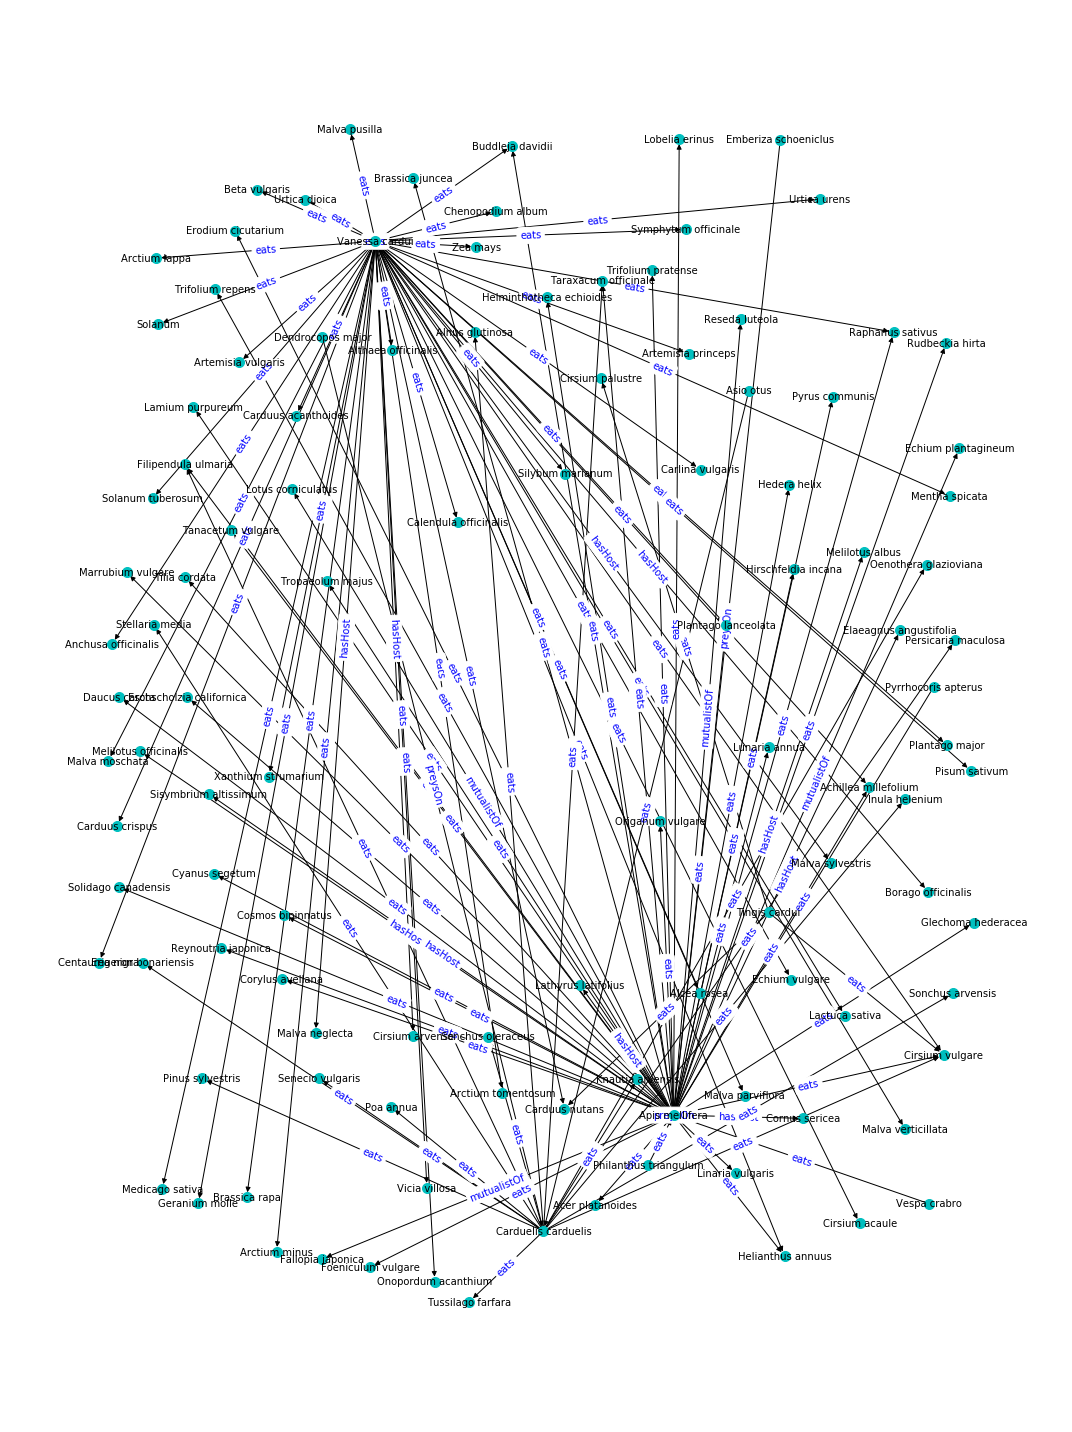

In [134]:
plt.figure(figsize=(15,20))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G, iterations=5, k=50) 
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=1)

#nodeColors = nx.get_node_attributes(G,'color')

nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size=100, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()

In [58]:
G.adj[0]

KeyError: 0

In [ ]:
nx.degree(G)

In [ ]:
taxaFoundInCountry

In [ ]:
taxaFoundInCountry

In [ ]:
filename = "waste.csv"
cleanInteractDataTaxon.to_csv (filename, index = True, header=True) 

In [ ]:
nx.path_graph(10)

In [ ]:
list(H.nodes)